In [2]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=54b2984cd204850b913215a8b6fd2534ee79c8511be2f35f8208663f18302827
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [3]:
import wikipedia
import numpy as np
import nltk
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.models import Sequential
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import tensorflow
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical  

2024-05-16 22:13:57.847044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 22:13:57.847163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 22:13:57.975042: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# import nltk
# import subprocess
# try:
#     nltk.data.find('wordnet.zip')
# except:
#     nltk.download('wordnet', download_dir='/kaggle/working/')
#     command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
#     subprocess.run(command.split())
#     nltk.data.path.append('/kaggle/working/')

# from nltk.corpus import wordnet

In [5]:
def get_data(topic, num_sentences):
    wikipedia.set_lang("en")
    content = wikipedia.page(topic).content
    sentences = content.split(". ")
    data = []
    for i in range(len(sentences) - num_sentences):
        data.append(" ".join(sentences[i:i+num_sentences]))
    return " ".join(data)

In [6]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    text = text.replace('\n', '')
    text = re.sub(r'\s+', ' ', text)
    tokens = []
    for token in text.split():
        if token not in stop_words and len(token) > 3:
            tokens.append(token)
    return " ".join(tokens)

In [22]:
topic = "Artificial intelligence"
num_sentences = 3
text = get_data(topic,num_sentences)
preprocessed_text = preprocess_text(text)
print(preprocessed_text)

artificial intelligence broadest sense intelligence exhibited machines particularly computer systems field research computer science develops studies methods software enable machines perceive environment uses learning intelligence take actions maximize chances achieving defined goals machines called aisai technology widely used throughout industry government science field research computer science develops studies methods software enable machines perceive environment uses learning intelligence take actions maximize chances achieving defined goals machines called aisai technology widely used throughout industry government science highprofile applications include advanced search engines google search recommendation systems used youtube amazon netflix interacting human speech google assistant siri alexa autonomous vehicles waymo generative creative tools chatgpt superhuman play analysis strategy games chess machines called aisai technology widely used throughout industry government scienc

In [8]:
chars = sorted(list(set(preprocessed_text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}

encoded_text = [char_to_int[c] for c in preprocessed_text]

seq_length = 100

sequences = []
for i in range(0, len(encoded_text) - seq_length, 1):
    sequences.append(encoded_text[i:i + seq_length + 1])


X = np.array([seq[:-1] for seq in sequences])
y = np.array([seq[-1] for seq in sequences])
print(X )
print("------------------------------------------------------------------------------------------")
print(y)

[[11 28 30 ... 15 23 29]
 [28 30 19 ... 23 29  0]
 [30 19 16 ... 29  0 16]
 ...
 [30 19 16 ... 19 17 15]
 [19 16 19 ... 17 15 24]
 [16 19 13 ... 15 24 13]]
------------------------------------------------------------------------------------------
[ 0 16 19 ... 24 13 15]


# Char Based RNN Model

In [9]:
model = tensorflow.keras.Sequential([
  Embedding(len(chars), 124),
#   Dropout(0.5),
  GRU(520, return_sequences=True),
  Bidirectional(layer=GRU(340, return_sequences=True,activation='tanh')),
  GlobalMaxPooling1D(),
  Dense(1024, activation='elu'),
  Dense(len(chars), activation='softmax'),  
])

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history=model.fit(X,y,epochs=7,batch_size=100)

Epoch 1/7
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 110s 67ms/step - accuracy: 0.2970 - loss: 2.3442
Epoch 2/7
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 106s 67ms/step - accuracy: 0.5948 - loss: 1.3181
Epoch 3/7
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 106s 67ms/step - accuracy: 0.7087 - loss: 0.9232
Epoch 4/7
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 106s 66ms/step - accuracy: 0.8198 - loss: 0.5628
Epoch 5/7
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 106s 66ms/step - accuracy: 0.8915 - loss: 0.3406
Epoch 6/7
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 106s 67ms/step - accuracy: 0.9231 - loss: 0.2470
Epoch 7/7
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 106s 66ms/step - accuracy: 0.9388 - loss: 0.1951


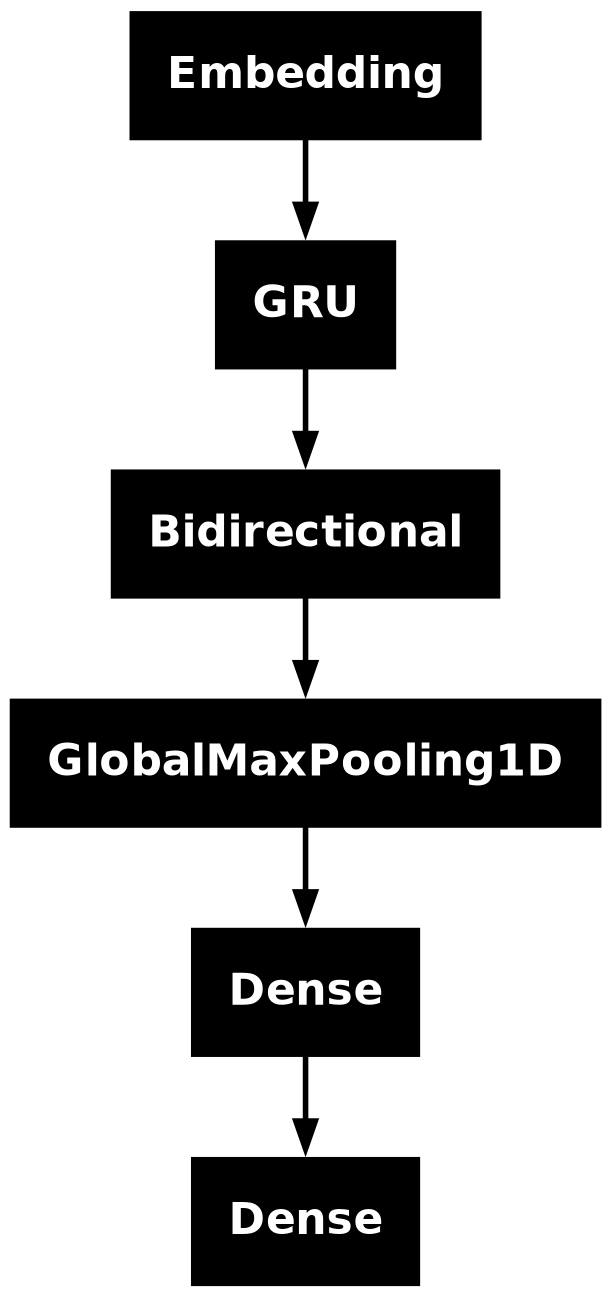

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model,'/kaggle/working/model2.png')

In [13]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(chars), 50, input_length=seq_length),
    tf.keras.layers.LSTM(150, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(chars), activation='softmax')
])

# Compile the model
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model2.fit(X, y, batch_size=128, epochs=50)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.1783 - loss: 2.7845
Epoch 2/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3540 - loss: 2.1338
Epoch 3/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4426 - loss: 1.8501
Epoch 4/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4931 - loss: 1.6746
Epoch 5/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.5281 - loss: 1.5596
Epoch 6/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5506 - loss: 1.4758
Epoch 7/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5672 - loss: 1.4156
Epoch 8/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5792 - loss: 1.3649
Epoch 9/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5903 - loss: 1.3197
Epoch 10/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6000 - loss: 1.2848
Epoch 11/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6069 - loss: 1.2578
Epoch 12

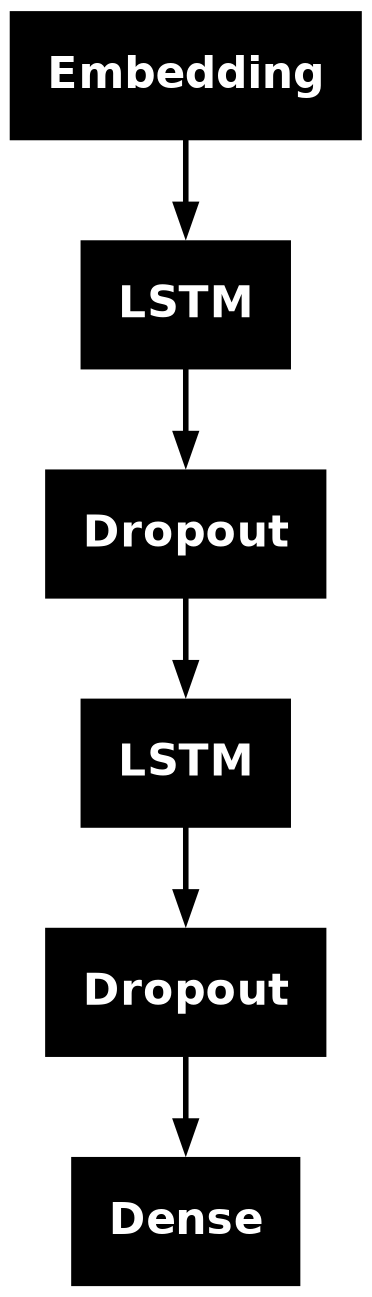

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model2,'/kaggle/working/model2.png')

# Simple RNN

In [26]:
Char_model = Sequential()
Char_model.add(Embedding(input_dim=len(chars), output_dim=124, input_length=seq_length))
Char_model.add(SimpleRNN(units=100))
Char_model.add(Dense(units=len(chars), activation='softmax'))
Char_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
history_1 = Char_model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
  16/4967 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.0374 - loss: 3.6443  

I0000 00:00:1715899077.444732      98 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4967/4967 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - accuracy: 0.3095 - loss: 2.3345
Epoch 2/10
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.4973 - loss: 1.6736
Epoch 3/10
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.5446 - loss: 1.5098
Epoch 4/10
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.5718 - loss: 1.4154
Epoch 5/10
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.5836 - loss: 1.3650
Epoch 6/10
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.5931 - loss: 1.3290
Epoch 7/10
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.6032 - loss: 1.2915
Epoch 8/10
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.6014 - loss: 1.2868
Epoch 9/10
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.6079 - loss: 1.2634
Epoch 10/10
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.6108 - loss: 1.2571


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
import random

In [47]:
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras.preprocessing.sequence import pad_sequences



def generate_text(model, char_to_int, int_to_char, seed_text, next_chars=20):
    
    input_seq = [char_to_int[char] for char in seed_text]
    
    for _ in range(next_chars):
        
        input_seq_padded = pad_sequences([input_seq], maxlen=seq_length, padding='pre')
        
        
        predicted_probs = model.predict(input_seq_padded, verbose=0)
        predicted_char_index = np.argmax(predicted_probs)
        predicted_char = int_to_char[predicted_char_index]
        

        input_seq.append(predicted_char_index)
    predicted_text = ''.join([int_to_char[idx] for idx in input_seq])
    
    return predicted_text

for i in range(10):
    start_idx = random.randint(0, len(preprocessed_text) - 1)
    seed_text = preprocessed_text[start_idx:start_idx + 1]
    generated_text = generate_text(Char_model, char_to_int, int_to_char, seed_text, next_chars=20)

    print("Seed text:", seed_text)
    print("Generated text:", generated_text)

Seed text: e
Generated text: experts also also als
Seed text: s
Generated text: states problems also 
Seed text:  
Generated text:  connection problems 
Seed text: s
Generated text: states problems also 
Seed text: a
Generated text: avary also also also 
Seed text: n
Generated text: nometion also also al
Seed text: t
Generated text: though subject also a
Seed text: u
Generated text: uncticister problems 
Seed text: d
Generated text: design subject also a
Seed text:  
Generated text:  connection problems 


# Word Based RNN Model

In [48]:
Seq_length = 5
words = preprocessed_text.split()
unique_words = sorted(set(words))
word_to_int = {w: i for i, w in enumerate(unique_words)}
int_to_word = {i: w for i, w in enumerate(unique_words)}

X_data_words = []
y_data_words = []
for i in range(len(words) - Seq_length):
    seq_in = words[i:i + Seq_length]
    seq_out = words[i + Seq_length] 
    X_data_words.append([word_to_int[word] for word in seq_in])
    y_data_words.append(word_to_int[seq_out])
    
X_data_words=np.array(X_data_words)
y_data_words=np.array(y_data_words)


In [49]:
model_word_generation = tensorflow.keras.Sequential()
model_word_generation.add(Embedding(len(unique_words), 312))
model_word_generation.add(LSTM(256, input_shape=(X_data_words.shape[1], 312),return_sequences=True))
model_word_generation.add(Dropout(0.2))
model_word_generation.add(LSTM(256))
model_word_generation.add(Dropout(0.2))
model_word_generation.add(Dense(len(unique_words), activation='softmax'))
model_word_generation.compile(loss='categorical_crossentropy', optimizer='adam')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model_word_generation.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model_word_generation.fit(X_data_words,y_data_words,epochs=20,batch_size=50)

Epoch 1/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0082 - loss: 7.6735
Epoch 2/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0148 - loss: 6.9913
Epoch 3/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0457 - loss: 5.9360
Epoch 4/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1667 - loss: 4.5229
Epoch 5/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3867 - loss: 3.2575
Epoch 6/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5949 - loss: 2.2608
Epoch 7/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7441 - loss: 1.5408
Epoch 8/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8266 - loss: 1.1082
Epoch 9/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8813 - loss: 0.8051
Epoch 10/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9195 - loss: 0.5770
Epoch 11/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9335 - loss: 0.4603
Epoch 12/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

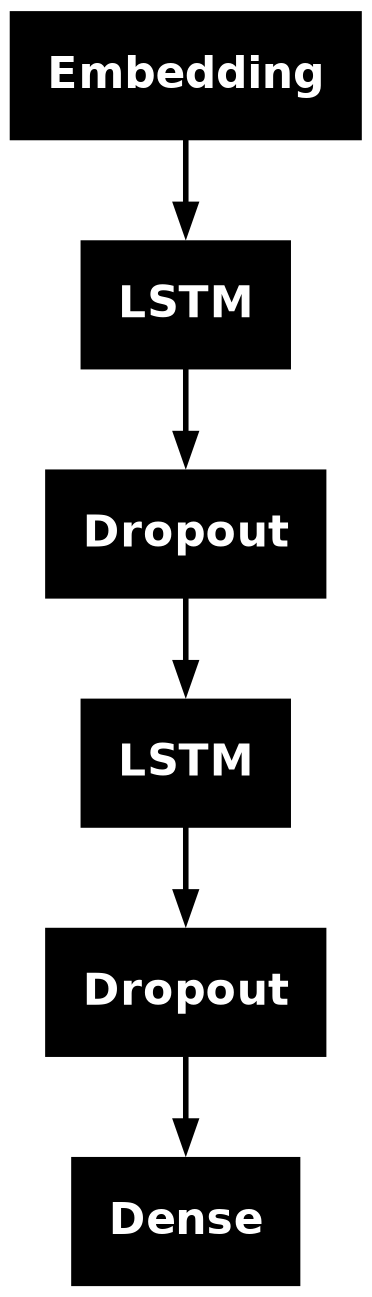

In [52]:
from tensorflow.keras.utils import plot_model
plot_model(model_word_generation,'/kaggle/working/model_word_gen.png')

# Simple RNN

In [63]:
model_2 = Sequential()
model_2.add(Embedding(input_dim=len(unique_words), output_dim=100, input_length=X_data_words.shape[1]))
model_2.add(SimpleRNN(units=100,return_sequences=True))
model_2.add(SimpleRNN(units=100,return_sequences=True))
model_2.add(SimpleRNN(units=100))
model_2.add(Dense(units=len(unique_words), activation='softmax'))

In [64]:
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
history_2 = model_2.fit(X_data_words, y_data_words, epochs=20, batch_size=32)

Epoch 1/20
 48/583 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0059 - loss: 7.8722

W0000 00:00:1715901957.852352      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


583/583 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0164 - loss: 7.5304
Epoch 2/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1777 - loss: 5.4370
Epoch 3/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4769 - loss: 3.6571
Epoch 4/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7253 - loss: 2.2663
Epoch 5/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8501 - loss: 1.3540
Epoch 6/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9008 - loss: 0.8543
Epoch 7/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9250 - loss: 0.5832
Epoch 8/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9416 - loss: 0.4198
Epoch 9/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9520 - loss: 0.3162
Epoch 10/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9542 - loss: 0.2698
Epoch 11/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9539 - loss: 0.2331
Epoch 12/20
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

In [76]:
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras.preprocessing.sequence import pad_sequences

def generate_text(model, word_to_int, int_to_word, seed_text, seq_length=5, num_words=10):
    input_seq = [word_to_int[word] for word in seed_text]

    for _ in range(num_words):
        input_seq_padded = pad_sequences([input_seq], maxlen=seq_length, padding='pre')

        predicted_probs = model.predict(input_seq_padded, verbose=0)
        predicted_word_index = np.argmax(predicted_probs)
        predicted_word = int_to_word[predicted_word_index]

        input_seq.append(predicted_word_index)
        # Trim input sequence to maintain fixed length
        input_seq = input_seq[-seq_length:]

    generated_text = ' '.join([int_to_word[idx] for idx in input_seq])
    return generated_text

# Example usage:
for i in range(10):
    start_idx = random.randint(0, len(unique_words) - 1)
    seed_text = [int_to_word[start_idx]]
    generated_text = generate_text(model_2, word_to_int, int_to_word, seed_text, seq_length=Seq_length, num_words=10)

    print("Seed text:", seed_text)
    print("Generated text:", generated_text)


Seed text: ['simulates']
Generated text: advanced suggests development peter behavior
Seed text: ['verbally']
Generated text: available became advanced computer next
Seed text: ['examples']
Generated text: redirect like three others games
Seed text: ['ineffective']
Generated text: citizens whites rlhf improved behavior
Seed text: ['tested']
Generated text: nations applications representations recognise irrelevant
Seed text: ['playstation']
Generated text: photos contrast whites white robots
Seed text: ['scoffs']
Generated text: photos contrast whites white robots
Seed text: ['alcine']
Generated text: rlhf governments artificial problem symbolic
Seed text: ['lack']
Generated text: 2015 discovery deduction funding machine
Seed text: ['implementation']
Generated text: search iraq object search natural
